In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

random_seed = 123
np.random.seed(random_seed)

# 1. Reading the data



Histone modifications play an important role in affecting gene regulation. Specific histone modifications at specific locations in or near the gene can alter the expression of genes. Predicting gene expression from histone modification signals is a widely studied research topic.

In this competition you will predict gene expression levels (low=0, high=1) based on the presence of histone modifications at specific locations in the gene. You will try to find the model that learns the true underlying model best.

For each gene a region of 10.000bp around the transcription start site of the gene is extracted (5000bp upstream and 5000bp downstream). This region is binned in 100 bins of 100bp. For each bin five core histone modification marks are counted [1].

The dataset is compiled from the "E047" (Primary T CD8+ naive cells from peripheral blood) celltype from Roadmap Epigenomics Mapping Consortium (REMC) database.

[1] Kundaje, A. et al. Integrative analysis of 111 reference human epige-
nomes. Nature, 518, 317–330, 2015.

We start by loading the Pandas library and reading the datasets into Pandas DataFrames:

In [3]:
import pandas as pd

train = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/ML-course-VIB-2020/master/data_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/ML-course-VIB-2020/master/data_test.csv")
test_label = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/ML-course-VIB-2020/master/data_test_label.csv")

In [4]:
train_ids = train.pop("GeneId")
train_labels = train.pop("Label")

# 2. Data pre-processing




In this case I choose scaling the features to [0,1]:

In [5]:
from sklearn import preprocessing

scaler_minmax = preprocessing.MinMaxScaler()
scaler_minmax.fit(train)
train_norm = pd.DataFrame(scaler_minmax.transform(train),columns=train.columns)
train_norm.head()

,H3K4me3_0,H3K4me1_0,H3K36me3_0,H3K9me3_0,H3K27me3_0,H3K4me3_1,H3K4me1_1,H3K36me3_1,H3K9me3_1,H3K27me3_1,H3K4me3_2,H3K4me1_2,H3K36me3_2,H3K9me3_2,H3K27me3_2,H3K4me3_3,H3K4me1_3,H3K36me3_3,H3K9me3_3,H3K27me3_3,H3K4me3_4,H3K4me1_4,H3K36me3_4,H3K9me3_4,H3K27me3_4,H3K4me3_5,H3K4me1_5,H3K36me3_5,H3K9me3_5,H3K27me3_5,H3K4me3_6,H3K4me1_6,H3K36me3_6,H3K9me3_6,H3K27me3_6,H3K4me3_7,H3K4me1_7,H3K36me3_7,H3K9me3_7,H3K27me3_7,...,H3K4me3_92,H3K4me1_92,H3K36me3_92,H3K9me3_92,H3K27me3_92,H3K4me3_93,H3K4me1_93,H3K36me3_93,H3K9me3_93,H3K27me3_93,H3K4me3_94,H3K4me1_94,H3K36me3_94,H3K9me3_94,H3K27me3_94,H3K4me3_95,H3K4me1_95,H3K36me3_95,H3K9me3_95,H3K27me3_95,H3K4me3_96,H3K4me1_96,H3K36me3_96,H3K9me3_96,H3K27me3_96,H3K4me3_97,H3K4me1_97,H3K36me3_97,H3K9me3_97,H3K27me3_97,H3K4me3_98,H3K4me1_98,H3K36me3_98,H3K9me3_98,H3K27me3_98,H3K4me3_99,H3K4me1_99,H3K36me3_99,H3K9me3_99,H3K27me3_99
0,0.047619,0.041667,0.044444,0.009615,0.073171,0.023810,0.095238,0.119048,0.00,0.04,0.047619,0.12,0.195122,0.041667,0.125000,0.00,0.074074,0.186047,0.017094,0.272727,0.047619,0.000000,0.074074,0.024194,0.068966,0.000000,0.000000,0.047619,0.009091,0.000000,0.095238,0.047619,0.155556,0.05,0.000000,0.00,0.055556,0.15,0.009091,0.066667,...,0.045455,0.636364,0.714286,0.071429,0.133333,0.045455,0.64,0.552632,0.060606,0.038462,0.041667,0.666667,0.574074,0.039216,0.133333,0.000000,0.454545,0.704545,0.081818,0.033333,0.052632,0.566667,0.547619,0.027523,0.071429,0.086957,0.333333,0.326531,0.058252,0.103448,0.10,0.500000,0.394737,0.050505,0.068966,0.074074,0.285714,0.342857,0.017391,0.046512
1,0.000000,0.000000,0.022222,0.009615,0.000000,0.047619,0.000000,0.047619,0.00,0.08,0.095238,0.00,0.024390,0.000000,0.041667,0.05,0.000000,0.023256,0.000000,0.000000,0.047619,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.00,0.000000,0.05,0.000000,0.00,0.000000,0.000000,...,0.136364,0.136364,0.000000,0.000000,0.000000,0.227273,0.08,0.026316,0.000000,0.000000,0.041667,0.055556,0.037037,0.019608,0.033333,0.090909,0.090909,0.022727,0.036364,0.033333,0.105263,0.033333,0.000000,0.018349,0.000000,0.000000,0.041667,0.020408,0.000000,0.000000,0.05,0.045455,0.000000,0.000000,0.000000,0.037037,0.028571,0.000000,0.000000,0.000000
2,0.333333,0.125000,0.022222,0.009615,0.024390,0.095238,0.095238,0.023810,0.01,0.08,0.095238,0.08,0.097561,0.008333,0.000000,0.05,0.037037,0.000000,0.000000,0.000000,0.190476,0.041667,0.000000,0.008065,0.034483,0.421053,0.095238,0.023810,0.018182,0.037037,0.190476,0.095238,0.044444,0.03,0.000000,0.05,0.111111,0.00,0.018182,0.000000,...,0.045455,0.000000,0.071429,0.000000,0.000000,0.090909,0.00,0.052632,0.010101,0.076923,0.125000,0.111111,0.055556,0.029412,0.066667,0.136364,0.045455,0.000000,0.009091,0.066667,0.105263,0.000000,0.000000,0.009174,0.107143,0.086957,0.000000,0.020408,0.009709,0.034483,0.05,0.045455,0.000000,0.020202,0.000000,0.037037,0.028571,0.028571,0.008696,0.000000
3,0.190476,0.083333,0.088889,0.009615,0.073171,0.000000,0.095238,0.023810,0.01,0.12,0.047619,0.24,0.024390,0.008333,0.041667,0.05,0.037037,0.000000,0.008547,0.045455,0.047619,0.041667,0.018519,0.000000,0.034483,0.105263,0.142857,0.023810,0.009091,0.000000,0.047619,0.047619,0.022222,0.02,0.066667,0.05,0.055556,0.05,0.009091,0.100000,...,0.045455,0.227273,0.000000,0.020408,0.000000,0.000000,0.12,0.078947,0.010101,0.038462,0.083333,0.111111,0.000000,0.000000,0.033333,0.227273,0.090909,0.045455,0.009091,0.066667,0.421053,0.033333,0.000000,0.009174,0.035714,0.086957,0.125000,0.020408,0.019417,0.068966,0.15,0.045455,0.052632,0.040404,0.068966,0.148148,0.085714,0.000000,0.000000,0.000000
4,0.047619,0.041667,0.044444,0.000000,0.195122,0.000000,0.095238,0.023810,0.01,0.12,0.000000,0.00,0.000000,0.016667,0.125000,0.05,0.111111,0.000000,0.008547,0.454545,0.047619,0.125000,0.000000,0.008065,0.275862,0.000000,0.000000,0.000000,0.027273,0.185185,0.000000,0.142857,0.044444,0.00,0.066667,0.05,0.000000,0.00,0.000000,0.100000,...,0.045455,0.045455,0.14285

# 3. Logistic regression


Let's start with `LogisticRegression`.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

train_X, val_X, train_y, val_y = train_test_split(train_norm,train_labels,
                                                  test_size=.2, random_state=random_seed)

cls = LogisticRegression()

cls.fit(train_X,train_y)
predictions_train = cls.predict(train_X)
predictions_val = cls.predict(val_X)
print("Accuracy: (%f) %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))
predictions_train_prob = cls.predict_proba(train_X)
predictions_val_prob = cls.predict_proba(val_X)
print("Log-loss: (%f) %f"%(log_loss(train_y,predictions_train_prob[:,1]),log_loss(val_y,predictions_val_prob[:,1])))

Accuracy: (0.863680) 0.854406
Log-loss: (0.348821) 0.375078


# 10. Neural Networks

How about a Neural Network?

In [17]:
from sklearn.neural_network import MLPClassifier

cls = MLPClassifier(hidden_layer_sizes=(2))

cls.fit(train_X,train_y)
predictions_train = cls.predict(train_X)
predictions_val = cls.predict(val_X)
print("Accuracy: (%f) %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))
predictions_train_prob = cls.predict_proba(train_X)
predictions_val_prob = cls.predict_proba(val_X)
print("Log-loss: (%f) %f"%(log_loss(train_y,predictions_train_prob[:,1]),log_loss(val_y,predictions_val_prob[:,1])))

Accuracy: (0.875419) 0.852969
Log-loss: (0.315746) 0.377125


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Is feature normalization required?

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=.2, random_state=random_seed)
cls_MLP.fit(train_X,train_y)
predictions_train = cls_MLP.predict(train_X)
predictions_val = cls_MLP.predict(val_X)
print("%f %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))

In [21]:
train_log = np.log(train+1)

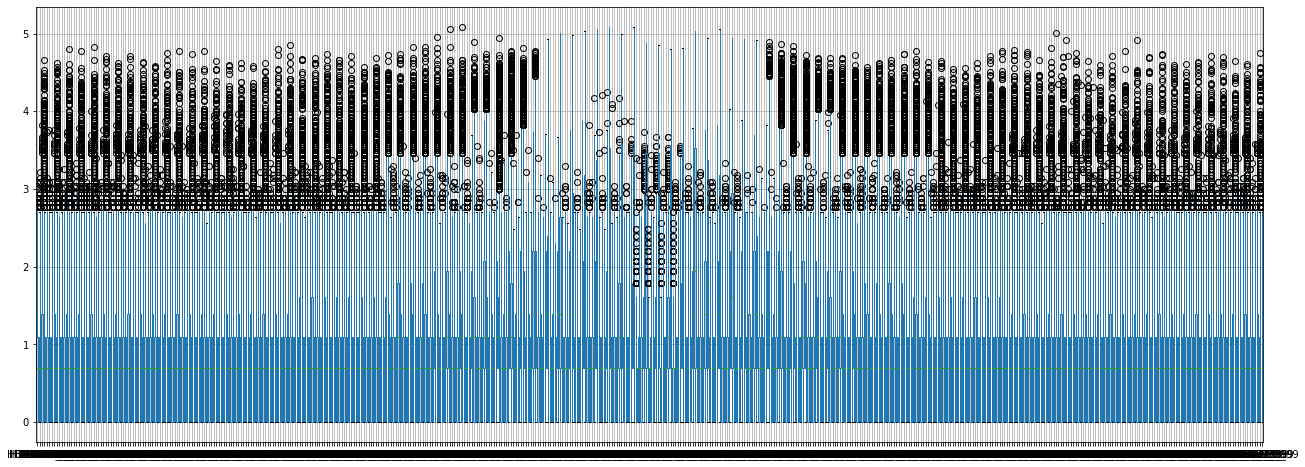

In [22]:
plt.figure(figsize=(22,8))
train_log.boxplot()
plt.show()

In [23]:
scaler_minmax.fit(train_log)
train_log_norm = scaler_minmax.transform(train_log)

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(train_log_norm,train_labels,
                                                  test_size=.2, random_state=random_seed)

In [26]:
cls = MLPClassifier(hidden_layer_sizes=(1))

cls.fit(train_X,train_y)
predictions_train = cls.predict(train_X)
predictions_val = cls.predict(val_X)
print("Accuracy: (%f) %f"%(accuracy_score(predictions_train, train_y),accuracy_score(predictions_val, val_y)))
predictions_train_prob = cls.predict_proba(train_X)
predictions_val_prob = cls.predict_proba(val_X)
print("Log-loss: (%f) %f"%(log_loss(train_y,predictions_train_prob[:,1]),log_loss(val_y,predictions_val_prob[:,1])))

Accuracy: (0.869070) 0.849138
Log-loss: (0.343074) 0.389238


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
